# Time series Analysis 

### Steps:
1. Data Ingestion
2. EDA
3. Preprocessing 
4. Model Building
5. Model Evaluation

In [1]:
link_to_data = "/home/omkar/Omkar Pawar/Data Science/Ineuron-FSDS-2.0/Assets/TSLA.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(link_to_data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


There are no null values our data looks clean. 
We should convert `Date` to `datetime`. 

univariate time series Vs multivariate time series

In [5]:
#univariate time series analysis:
stock_data = df[["Date", "Close"]]
stock_data

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Close   2416 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.9+ KB


In [7]:
import warnings
warnings.filterwarnings('ignore') # for clean code we will ignore warnings which are not serious warnings

In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Close   2416 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.9 KB


In [10]:

"""
Some Libraries related to TimeSeries analysis requires to have Date column as index column. 
"""
stock_data.set_index("Date") # it will make it easier to navigate through data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [11]:
stock_data.describe()

,Date,Close
count,2416,2416.000000
mean,2015-04-15 11:09:56.026490112,186.403651
min,2010-06-29 00:00:00,15.800000
25%,2012-11-19 18:00:00,34.400002
50%,2015-04-16 12:00:00,212.960007
75%,2017-09-07 06:00:00,266.774994
max,2020-02-03 00:00:00,780.000000
std,NaN,119.136020


In [12]:
import numpy as np
import matplotlib.pyplot as plt

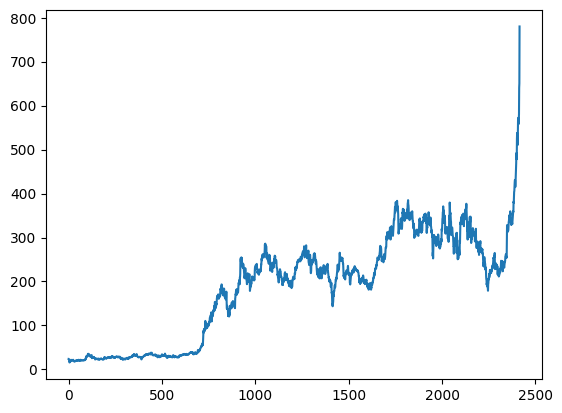

In [13]:
plt.plot(stock_data.Close)

(array([729., 142., 720., 520., 275.,  12.,   9.,   6.,   2.,   1.]),
 array([ 15.8 ,  92.22, 168.64, 245.06, 321.48, 397.9 , 474.32, 550.74,
        627.16, 703.58, 780.  ]),
 <BarContainer object of 10 artists>)

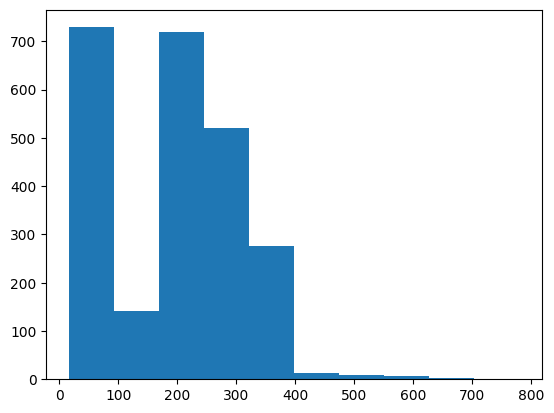

In [14]:
plt.hist(stock_data.Close)

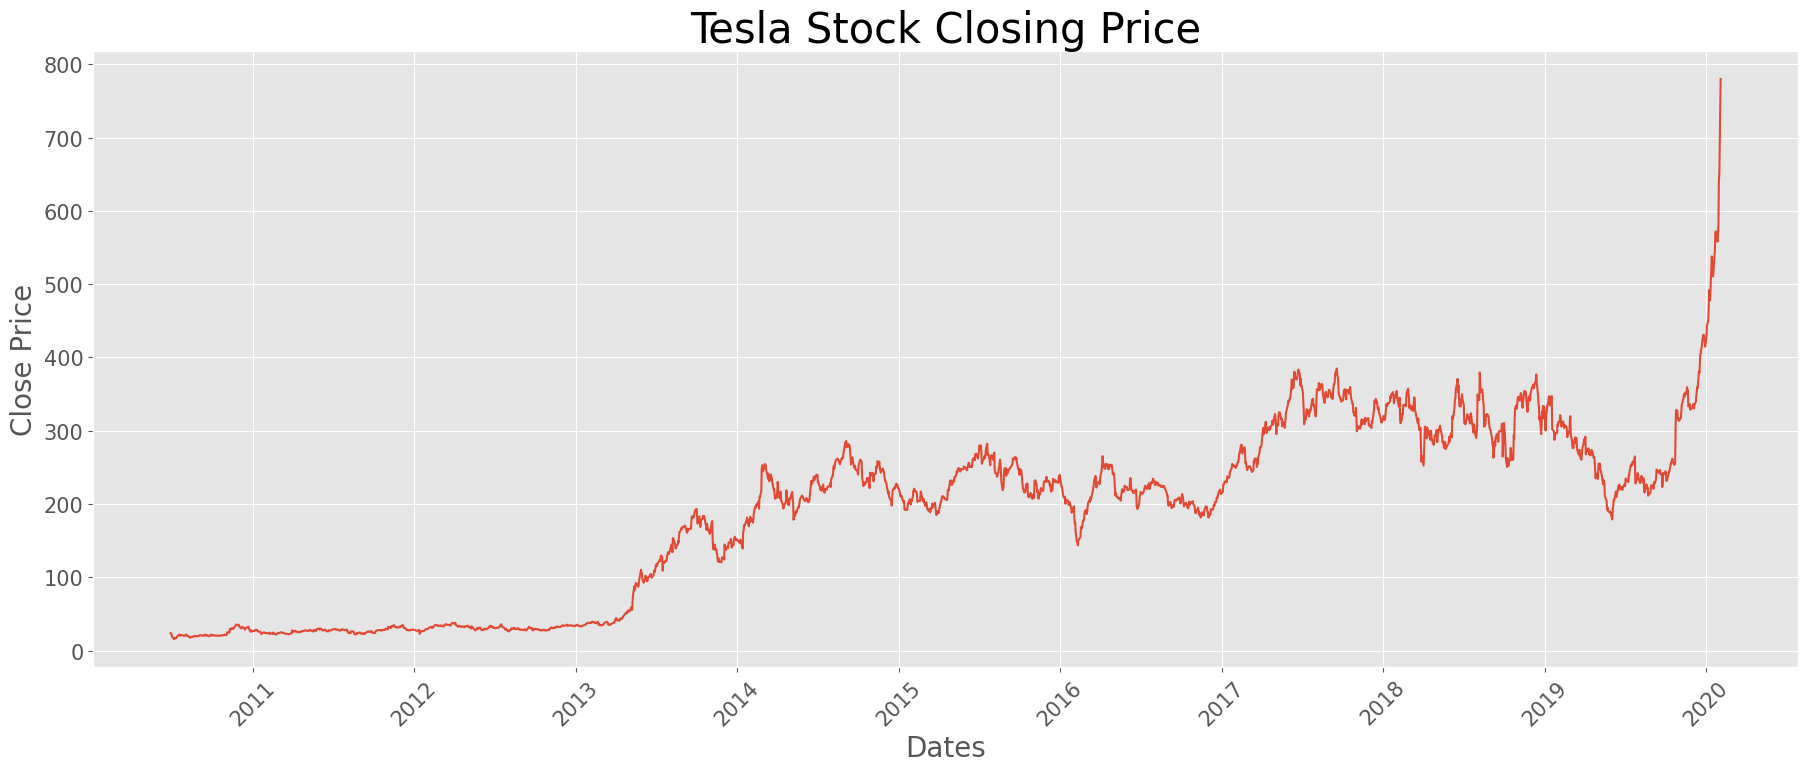

In [15]:
plt.style.use("ggplot")

plt.figure(figsize=(22, 8))
plt.plot(stock_data["Date"], stock_data["Close"])
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Close Price", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Tesla Stock Closing Price", fontsize=30)
plt.show()


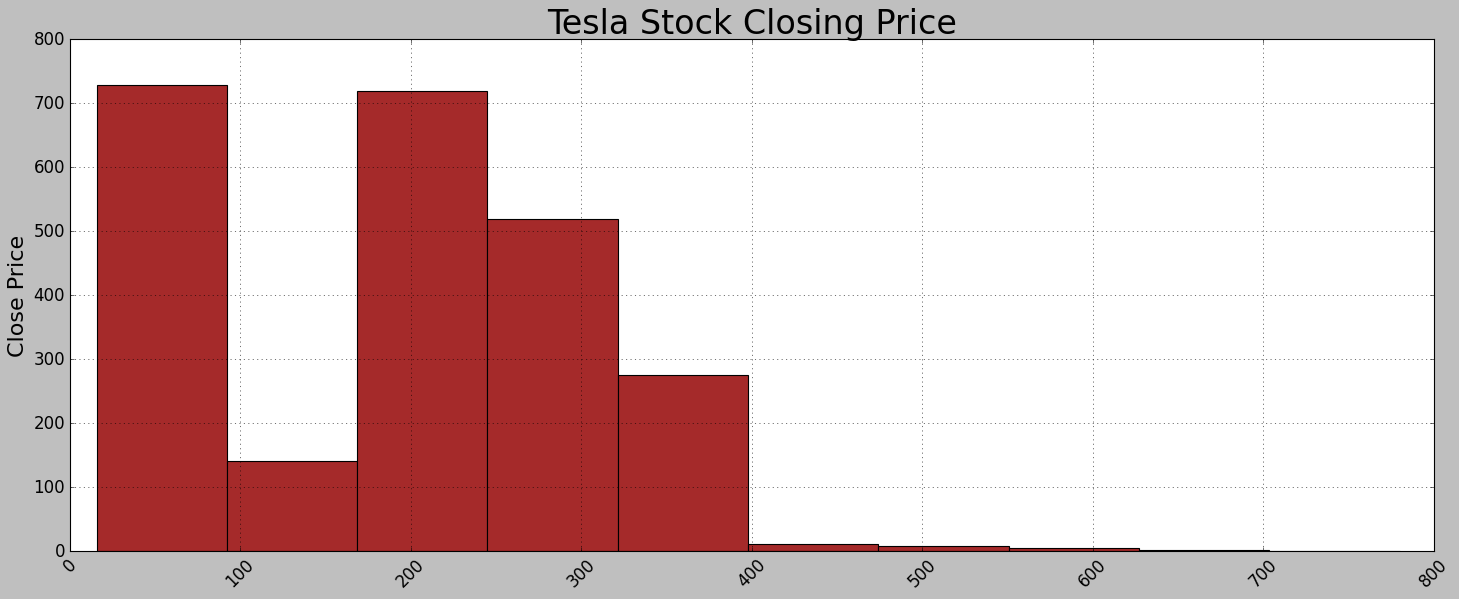

In [16]:
plt.style.use("classic")

plt.figure(figsize=(22, 8))
plt.hist(stock_data["Close"], color="Brown")
plt.grid(True)
# plt.xlabel("Dates", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Close Price", fontsize=20)
plt.yticks(fontsize=15)
plt.title("Tesla Stock Closing Price", fontsize=30)
plt.show()

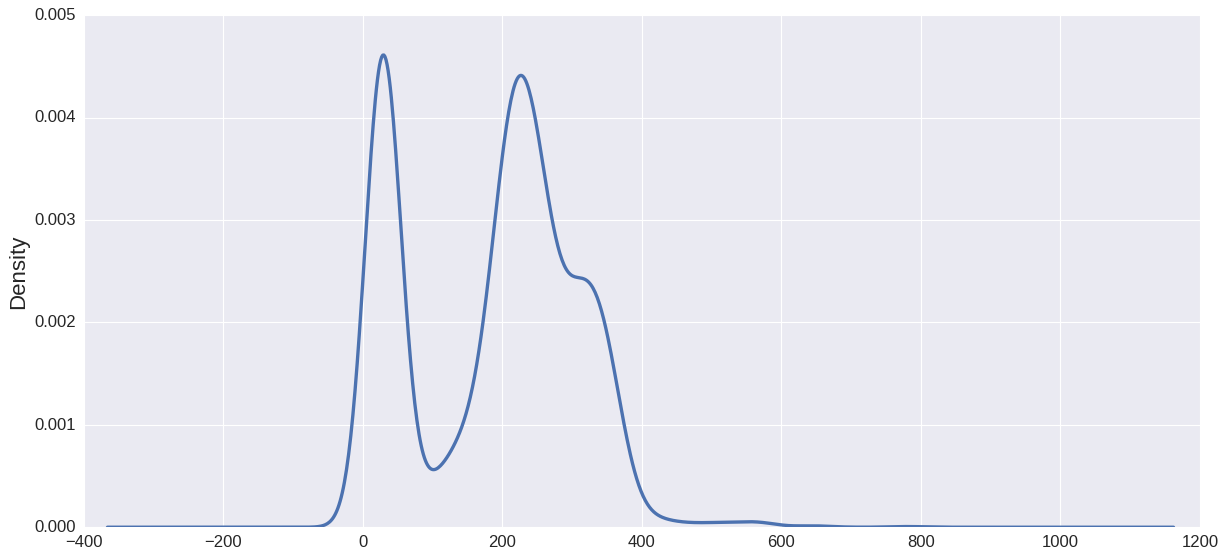

In [17]:
plt.style.use("seaborn")

df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [25]:
stock_data["Close"].rolling(4).mean() 

0              NaN
1              NaN
2              NaN
3        22.220000
4        20.275000
           ...    
2411    565.485016
2412    567.682510
2413    586.680008
2414    609.817505
2415    663.092499
Name: Close, Length: 2416, dtype: float64

In [28]:
rolmean=stock_data["Close"].rolling(365).mean() # rolling(val) val is window size for moving average... 

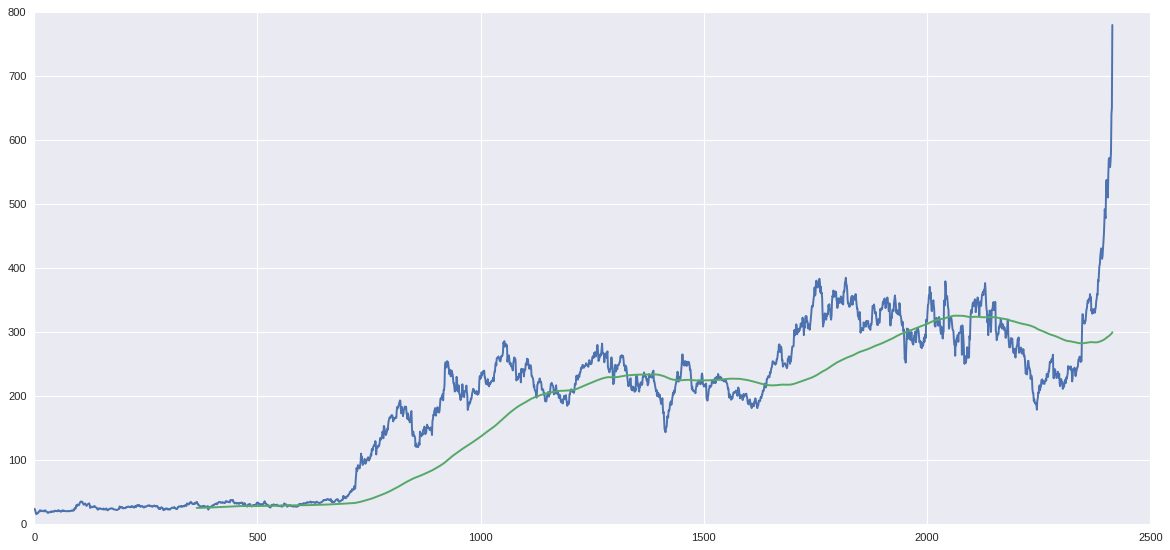

In [29]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller # ad
adft=adfuller(stock_data["Close"])

In [21]:
adft

(1.4000685020861605,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [30]:
pd.Series(adft[0:4], index = ["test stats", "p-value", "lag", "data point"])

test stats       1.400069
p-value          0.997114
lag             18.000000
data point    2397.000000
dtype: float64

In [52]:
# Test for Stationary:

def testStationary(timeseries):
    # determining rolling statistics
    rolmean = timeseries.rolling(365).mean() #rolling mean
    rolstd = timeseries.rolling(365).std() #rolling standard deviation

    # plot rolling statistics:
    plt.figure(figsize=(18,8))
    plt.grid("both")
    plt.plot(timeseries, color= "blue", label="Original", linewidth=3)
    plt.plot(rolmean, color= "red", label="Rolling Mean", linewidth= 3)
    plt.plot(rolstd, color= "green", label="Rolling std", linewidth= 4)
    plt.legend(loc="best", fontsize=20, shadow = True, facecolor = "lightpink", edgecolor = "k")
    plt.title("Rolling mean and Standard Deviation", fontsize=25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

    print("Result of dickey Fuller Test")
    adft = adfuller(timeseries, autolag="AIC")
    # output for adft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop.
    output = pd.Series(adft[0:4], index = ["Test Statistics", "p-values", "No of lags used", "NO of observations used"])

    for key, values in adft[4].items():
        output['critical value(%s)'%key] = values
    print(output)




In [50]:
stock_data

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


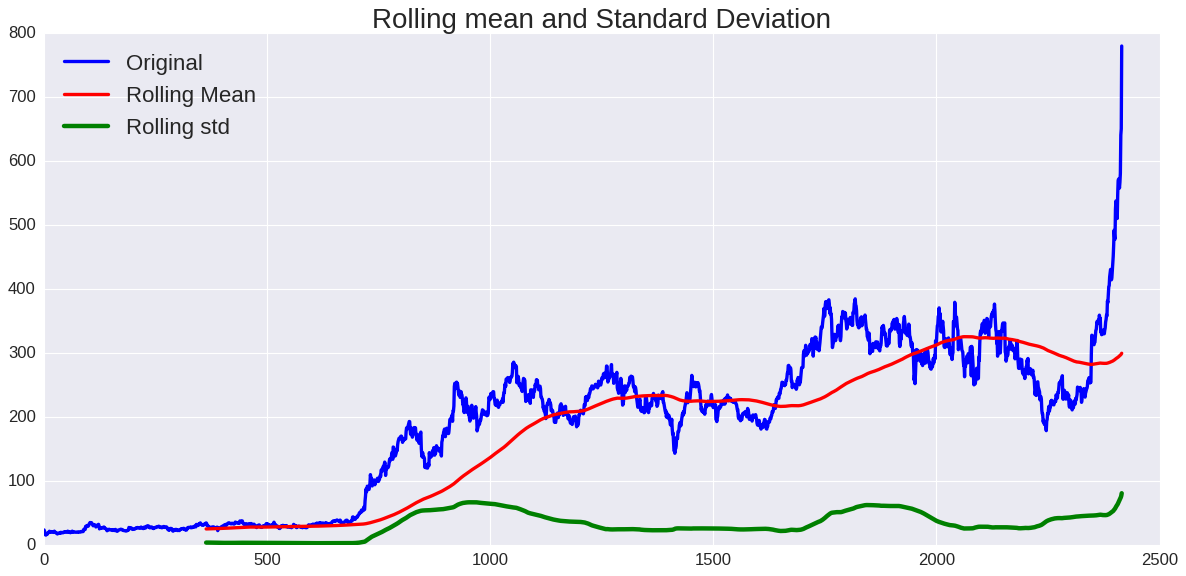

Result of dickey Fuller Test
Test Statistics               1.400069
p-values                      0.997114
No of lags used              18.000000
NO of observations used    2397.000000
critical value(1%)           -3.433081
critical value(5%)           -2.862747
critical value(10%)          -2.567412
dtype: float64


In [53]:
testStationary(stock_data['Close'])

----------

### Convert from non stationary to stationary:

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

<Figure size 1600x800 with 0 Axes>

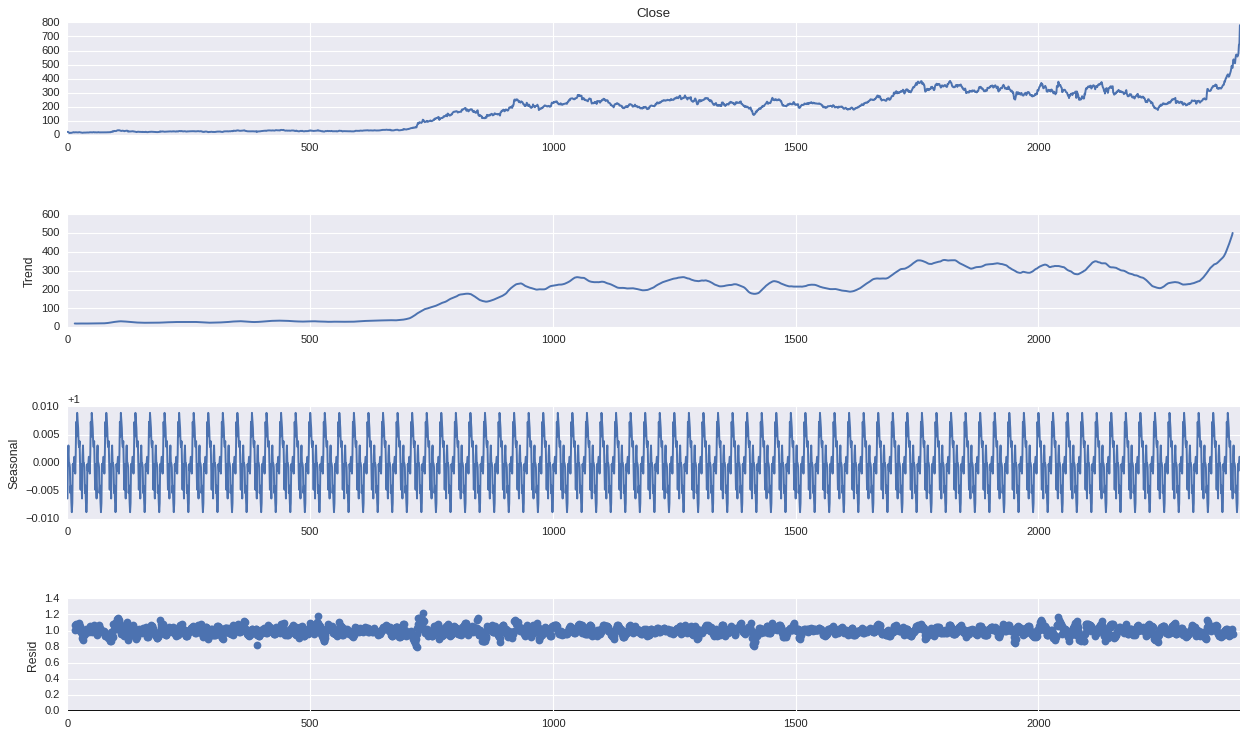

In [56]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [57]:
result.seasonal

0       0.993679
1       1.001199
2       1.003070
3       0.999954
4       0.999935
          ...   
2411    0.999806
2412    0.998551
2413    0.999889
2414    1.001062
2415    1.000970
Name: seasonal, Length: 2416, dtype: float64

In [58]:
result.resid

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2411   NaN
2412   NaN
2413   NaN
2414   NaN
2415   NaN
Name: resid, Length: 2416, dtype: float64

In [59]:
result.trend

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2411   NaN
2412   NaN
2413   NaN
2414   NaN
2415   NaN
Name: trend, Length: 2416, dtype: float64

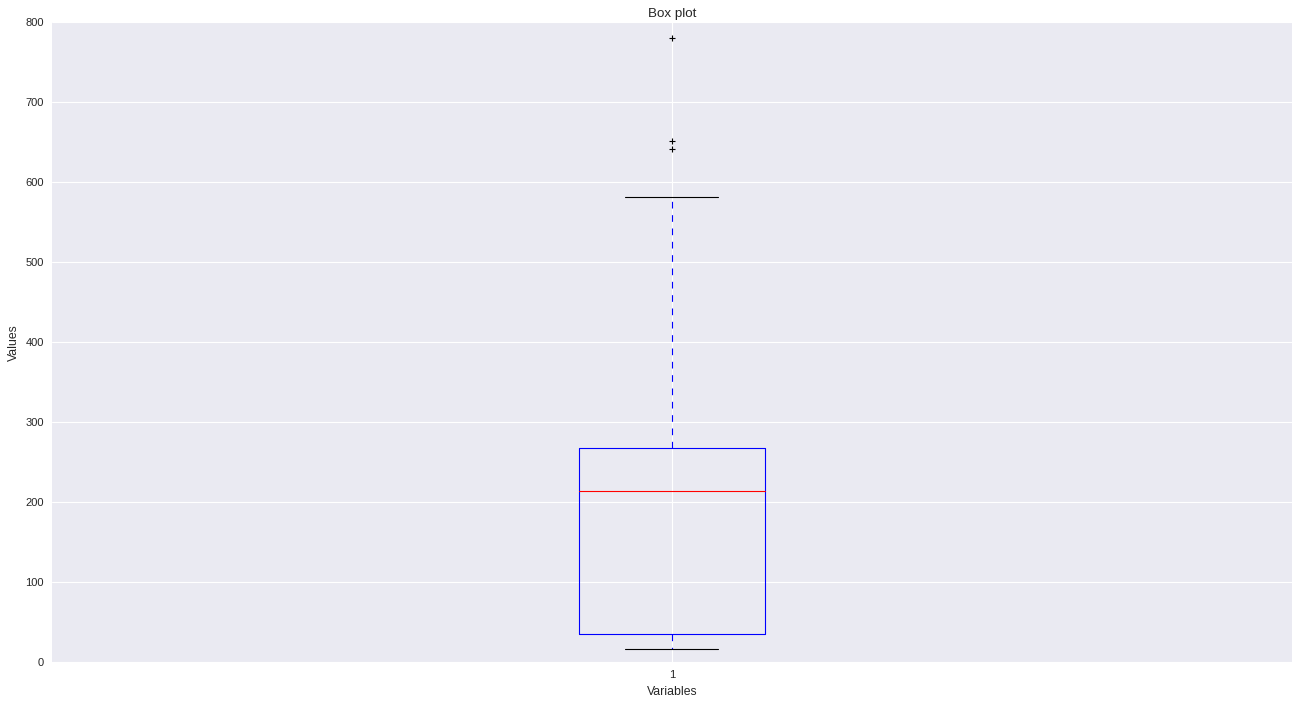

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

In [61]:
# There are few outliers 

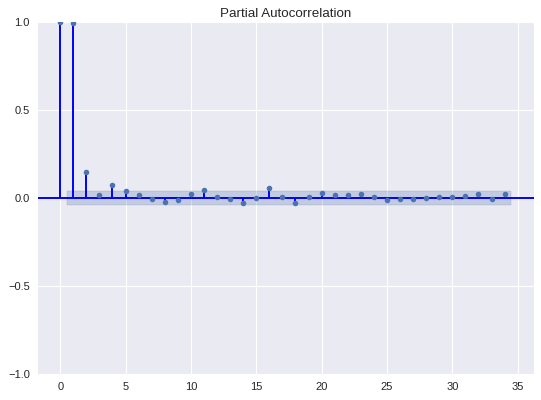

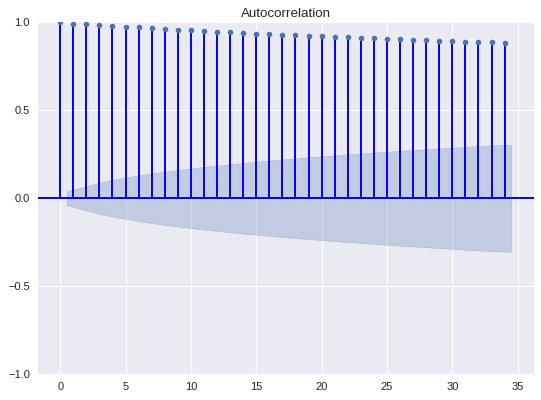

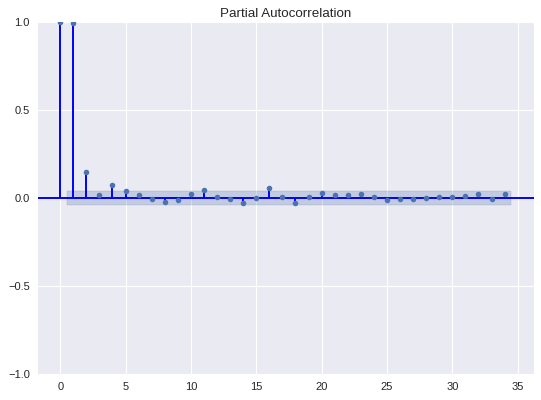

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [63]:
df_close = stock_data["Close"]
df_close.diff()

0              NaN
1        -0.059999
2        -1.870001
3        -2.759998
4        -3.090000
           ...    
2411      8.880004
2412     14.089966
2413     59.820008
2414      9.760009
2415    129.429993
Name: Close, Length: 2416, dtype: float64

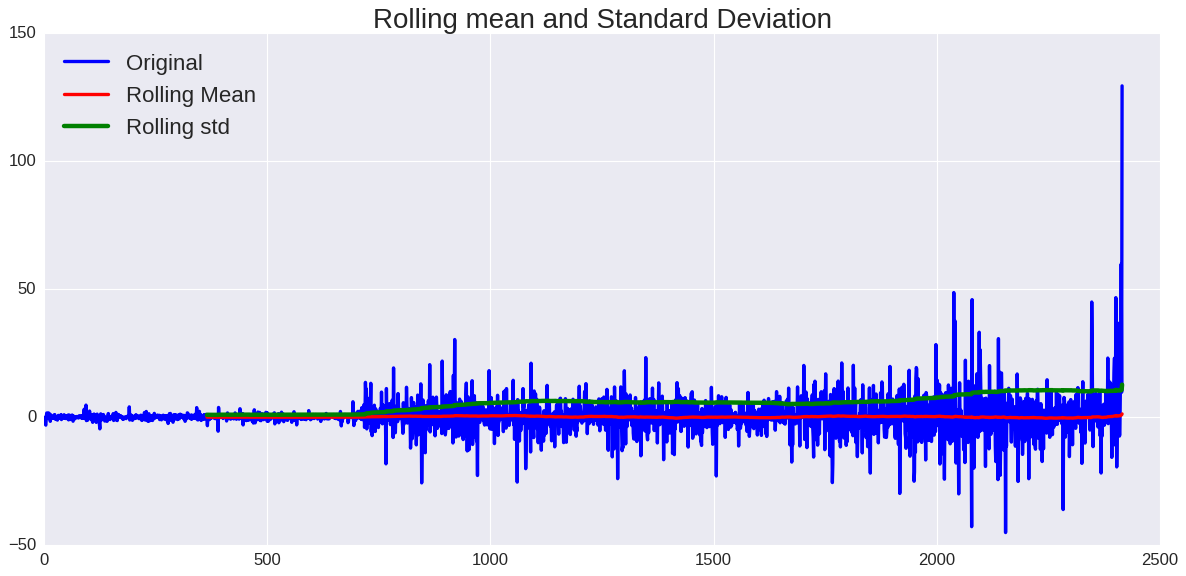

Result of dickey Fuller Test
Test Statistics           -6.151177e+00
p-values                   7.555858e-08
No of lags used            1.700000e+01
NO of observations used    2.397000e+03
critical value(1%)        -3.433081e+00
critical value(5%)        -2.862747e+00
critical value(10%)       -2.567412e+00
dtype: float64


In [67]:
tsla_diff_1 = df_close.diff().dropna()
testStationary(tsla_diff_1)

p - value is close to zero hence we reject null hypothesis(i.e. data is non stationary)

now there is no requirement for doing further differencing ...

In [64]:
df_close.diff(2)

0              NaN
1              NaN
2        -1.930000
3        -4.629999
4        -5.849998
           ...    
2411      2.080017
2412     22.969970
2413     73.909974
2414     69.580017
2415    139.190002
Name: Close, Length: 2416, dtype: float64

In [65]:
df_close.diff(3)

0              NaN
1              NaN
2              NaN
3        -4.689998
4        -7.719999
           ...    
2411     -5.299988
2412     16.169983
2413     82.789978
2414     83.669983
2415    199.010010
Name: Close, Length: 2416, dtype: float64

example chart:

![diff](https://slader-solution-uploads.s3.amazonaws.com/effbb0d3-c0ad-4e01-829d-c20472898e4f-1647124074649880.png)

differencing is done to convert data from non stationary to stationary

In [68]:
df_close.size

2416

In [84]:
train_data = df_close[0:-1000]
test_data = df_close[-1000:0]


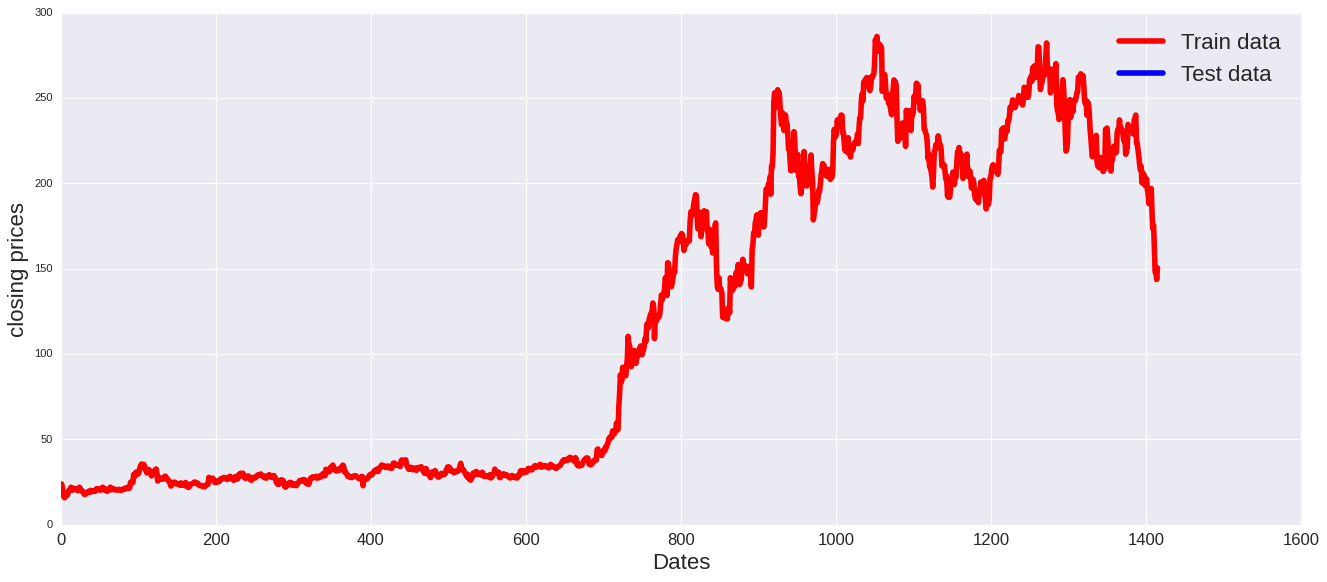

In [86]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.xlabel("Dates", fontsize= 20)
plt.ylabel("closing prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'red', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightgrey', edgecolor = "k")

In [91]:
from  statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
history = [x for x in train_data]

In [93]:
model = ARIMA(history, order = (1, 1, 1)) 

"""
order = (AR, I, MA)
"""

'\norder = (AR, I, MA)\n'